--------------------------------  ----------
Bending stress                    69.941 MPa
Shear stress                      10.88 MPa
Max principal stress              71.594 MPa
Safety factor - Tresca Criterion  5.461
--------------------------------  ----------
------------------------------  ------------
Maximum deflection              1.227 mm
Critical speed                  89.401 rad/s
Safety factor - Critical speed  2.235
------------------------------  ------------


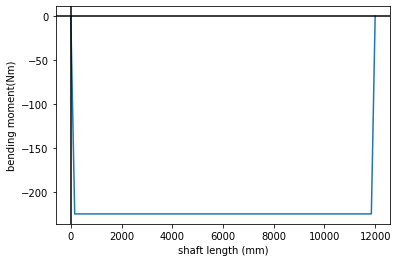

In [2]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
global sigmaY,sigmaUTS,sigmaE,E
import math as mt
sigmaY=480*(10**6) #yield strength
sigmaUTS=620*(10**6) # ultimate tensile strength
sigmaE=0.5*sigmaUTS # fatigue strength
E=210*(10**9) # Young's modulus
def fatigue(d,kf,kfs,T):
#(diameter, fatigue scf1,scf2,torque)
    se=sigmaE
    tm=T
    sy=sigmaY
    ma=(stressCalc(1.1,0.2,3000,0,0.01,0.015,15,1.2)[4])/1000
    sf=1/((16/(np.pi*(d**3)))*((4*((kf*ma/se)**2)+3*((kfs*tm/sy)**2))**0.5))
    #return fatigue sf
    return str(round(sf,3))

def stressCalc(L,l,wc,wp,r1,r2,T,kt):
#(total length of shaft, distance of bearing from shaft end, curb weight, weight of person, radius 1, radius 2, SCF)
    Lmm=L*1000
    lmm=l*1000
    I1=(mt.pi/4)*(r1**4) # second moment of area of first section
    I2=(mt.pi/4)*(r2**4) # second moment of area of second shaft section
    Mmax=-((wc+wp)*l)/2 # max BM
    sigmaB=Mmax*(-r2)/I2 # bending stress
    J=np.pi/2*(r2**4) # polar moment of area
    ss=(T*r2)/J # shear stress
    yp=np.sqrt((sigmaB**2)+4*(ss**2)) #principal stress
    s1=0.5*sigmaB+0.5*np.sqrt(4*(ss**2)+(sigmaB**2))
    sf=sigmaY/(yp*kt) #safety factor

    x=np.arange(0,Lmm,1) #set range of x values
    y=np.zeros(round(Lmm)) #initialise array of BM
    y[0:int(lmm+1)]=-((wc+wp)/2)*(x[0:int(lmm+1)]/1000) #section 1 BM
    y[int(lmm):int(l-lmm+1)]=Mmax #section 2 BM
    y[int(l-lmm-1):len(x)]=np.flip(y[0:int(lmm)]) #section 3 BM
    #plotting and formatting
    plt.plot(x,y)
    plt.xlabel('shaft length (mm)')
    plt.ylabel('bending moment(Nm)')
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    #return bending stress, shear stress, max principal stress and Tresca SF
    return (str(round(sigmaB/(10**6),3))+' MPa',
            str(round(ss/(10**6),3))+' MPa',str(round(s1/(10**6),3))+' MPa',
            str(round(sf,3)),Mmax)


def criticalSpeed(L,l,d,wc,wp):
    #(shaft length, distance from end to bearing, diameter,curb weight, weight of person)
    I=(mt.pi/4)*((d/2)**4) # second moment of area
    wt=wc+wp # total weight
    g=9.81 #gravity
    d=-(wt/(12*E*I))*(-((L/2)**3)+(((L/2)-l)**3)) # max deflection
    w=np.sqrt(g/d) #critical velocity
    wOperate=40 # max operating angular velocity
    sf=w/wOperate #safety factor 
    #return deflection, critical velocity and SF
    return (str(round((d*1000),3))+ " mm",str(round(w,3))+ " rad/s",str(round(sf,3)))

a,b,c,d,e=stressCalc(12,0.15,3000,0,0.01,0.016,70,1.2)
#e=fatigue(0.07,1.2,1.2,0.015)

#tabulate stress analysis data
data = [
[ 'Bending stress',a ],
['Shear stress', b],
['Max principal stress',c],
['Safety factor - Tresca Criterion',d]] 
print(tabulate(data))

#tabulate critical velocity data
a,b,c=criticalSpeed(0.096,0.016,0.0045,800,0)   

data = [
[ 'Maximum deflection',a ],
['Critical speed', b],
['Safety factor - Critical speed',c]] 
print(tabulate(data))

    